In [13]:
import cv2


## Questão 51
Utilizar o método Scale Invariant Feature Transform (SIFT) para detectar onde está um objeto conhecido à priori em uma imagem através dos keypoints detectados por este método. Desenhar os keypoints em comum e marcar o objeto procurado na imagem.

## SIFT - Scale-Invariant Feature Transform
The scale-invariant feature transform (SIFT) is an algorithm used to detect and describe local features in digital images. It locates certain key points and then furnishes them with quantitative information (so-called descriptors) which can for example be used for object recognition. The descriptors are supposed to be invariant against various transformations which might make images look different although they represent the same object(s). More about that below.

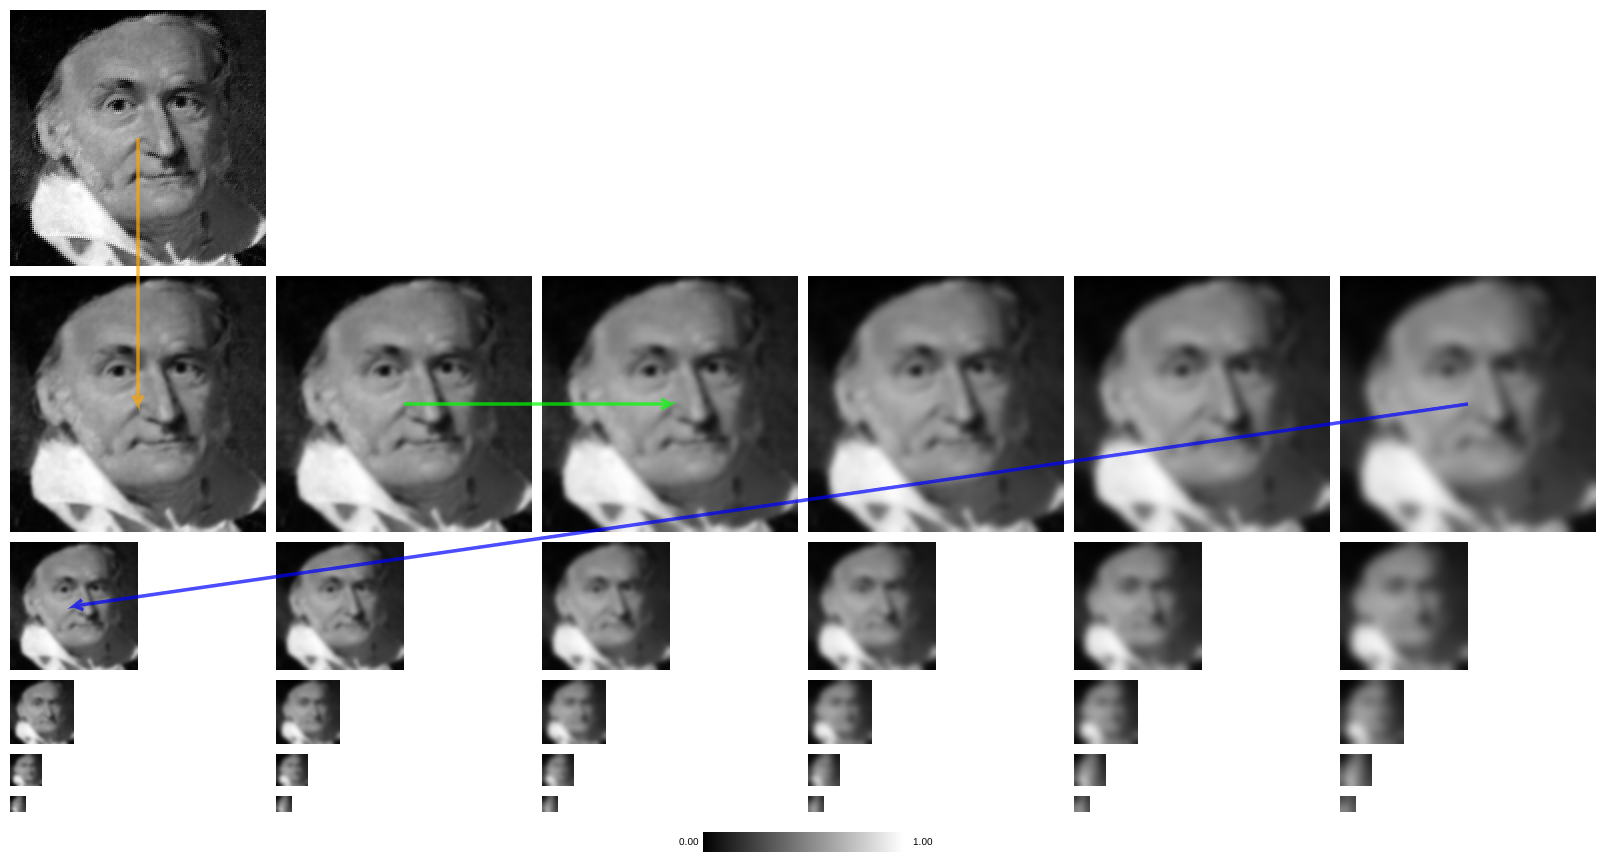

We start with the picture you provided or with our default picture, a portrait of Carl Friedrich Gauß. The algorithm first doubles the width and height of its input using bilinear_interpolation. That's the first picture above, the one in its own row.

This picture is subsequently blurred using a Gaussian convolution. That's indicated by the orange arrow.

What follows is a sequence of further convolutions with increasing standard deviation. Each picture further to the right is the result of convoluting its left neighbor, as indicated by the green arrow.

Finally, the picture at the end of each row is downsampled - see the blue arrow. This starts another row of convolutions. We repeat this process until the pictures are too small to proceed. (By the way, each row is usually called an octave since the sampling rate is decreased by a factor of two per stage.)

What we now have constructed is called a scale space. The point of doing this is to simulate different scales of observation (as you move further down in the table) and to suppress fine-scale structures (as you move to the right).

Note that the representation above has been normalized - see the gray chart at its bottom. This will be especially noticeable for low-contrast images. (An input with full contrast will have black at 0.00 and white at 1.00.)

Now for the next step. Let's imagine for a moment that each octave of our scale space were a continuous space with three dimensions: the x and y coordinates of the pixels and the standard deviation of the convolution. In an ideal world, we would now want to compute the Laplacian of the scale-space function which assigns gray values to each element of this space. The extrema of the Laplacian would then be candidates for the key points our algorithm is looking for. But as we have to work in a discrete approximation of this continuous space, we'll instead use a technique called difference of Gaussians.

For each pair of horizontally adjacent pictures in the table above, we compute the differences of the individual pixels.

In [14]:
# Read the rgb images
image = cv2.imread('img/q51a.jpg')
logo = cv2.imread('img/q51logo.jpg')

# Convert the images to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)

In [15]:
# Create a SIFT detector (Obs.: in order to use sift descriptor you will have to install opencv-contrib
# from scratch. An alternative to that is to use opencv implementation called orb, it has almost the
# same result. To use orb, comment the lines with sift and uncomment the lines with orb.)
#sift = cv2.xfeatures2d.SIFT_create()
orb = cv2.ORB_create()

# Find the keypoints and descriptors with SIFT
#keypoints_1, descriptors_1 = sift.detectAndCompute(image, None)
#keypoints_2, descriptors_2 = sift.detectAndCompute(logo, None)

keypoints_1, descriptors_1 = orb.detectAndCompute(image, None)
keypoints_2, descriptors_2 = orb.detectAndCompute(logo, None)


In [16]:
# Create a BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors_1, descriptors_2)

# Draw only the first match
resultSIFT = cv2.drawMatches(image, keypoints_1, logo, keypoints_2, matches[:2], None, flags=2)

Questão 52
Utilizar o método Speeded Up Robust Features (SURF) para detectar onde está um objeto conhecido à priori em uma imagem através dos keypoints detectados por este método. Desenhar os keypoints em comum e marcar o objeto procurado na imagem.

In [17]:
# Create a SURF detector (Obs.: in order to use surf descriptor you will have to install opencv-contrib
# from scratch. An alternative to that is to use opencv implementation called orb, it has almost the
# same result. To use orb, comment the lines with surf and uncomment the lines with orb.)
#surf = cv2.xfeatures2d.SURF_create()
orb = cv2.ORB_create()

# Find the keypoints and descriptors with SIFT
#keypoints_1, descriptors_1 = surf.detectAndCompute(image, None)
#keypoints_2, descriptors_2 = surf.detectAndCompute(logo, None)

keypoints_1, descriptors_1 = orb.detectAndCompute(image, None)
keypoints_2, descriptors_2 = orb.detectAndCompute(logo, None)

In [18]:
# Create a BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors_1, descriptors_2)

# Draw only the first match
resultSURF = cv2.drawMatches(image, keypoints_1, logo, keypoints_2, matches[:2], None, flags=2)

In [19]:
# Show the result
cv2.imshow('Result Sift', resultSIFT)
cv2.imshow('Result SURF', resultSURF)
cv2.waitKey(0)

# Save the result
cv2.imwrite('result/sift_result.jpg', resultSIFT)
cv2.imwrite('result/surf_result.jpg', resultSURF)

True

### para fechar as janelas

In [20]:
#para fechar todas as janelas abertas
while(True):
    k = cv2.waitKey(0)
    if k == -1:  # if no key was pressed, -1 is returned
        continue
    else:
        break
cv2.destroyAllWindows()